In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from pathlib import Path
import os
import glob
from datetime import datetime

import model.hyperparameters as hp
from model.seq2seq_LSTM import Encoder, Decoder
from utils.train import LSTM_train_fn
from utils.dataset import (
    SmartwatchDataset, 
    SmartwatchAugmentLstm, 
    get_file_lists
)
from utils.utils import test_LSTM

SAVE_PATH = Path('/root/jonathan/syde770-project/outputs/07-04-2023_200826')

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/rnn.py:67: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


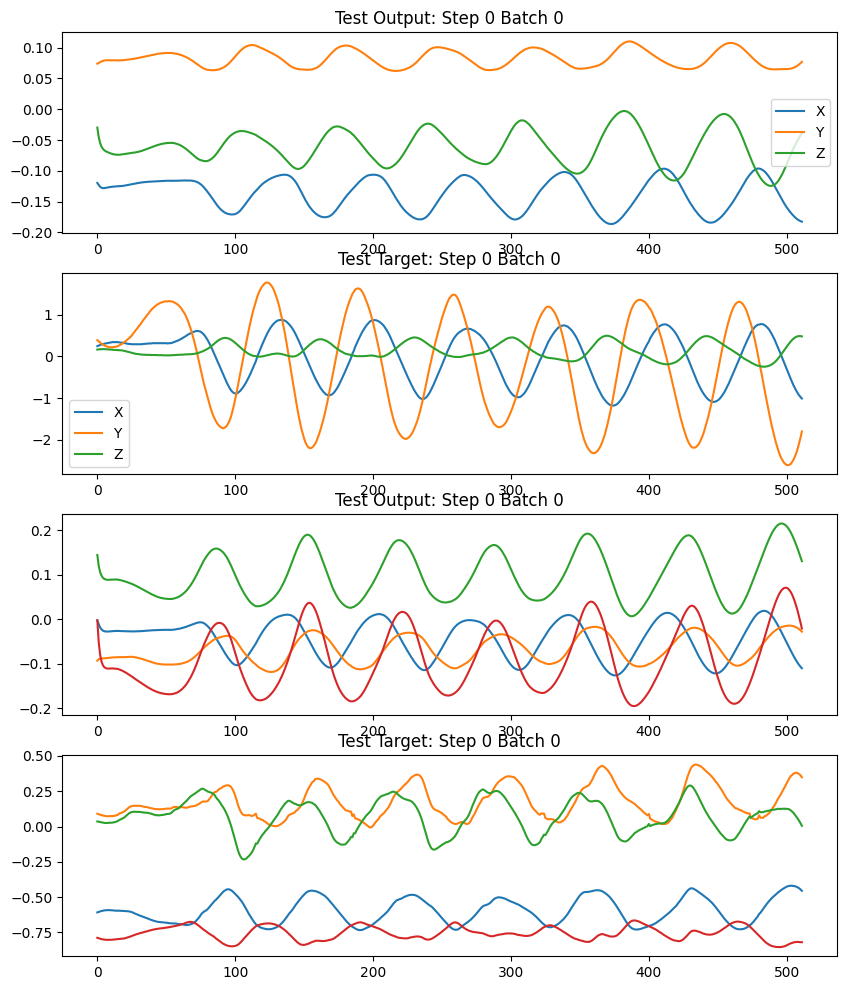

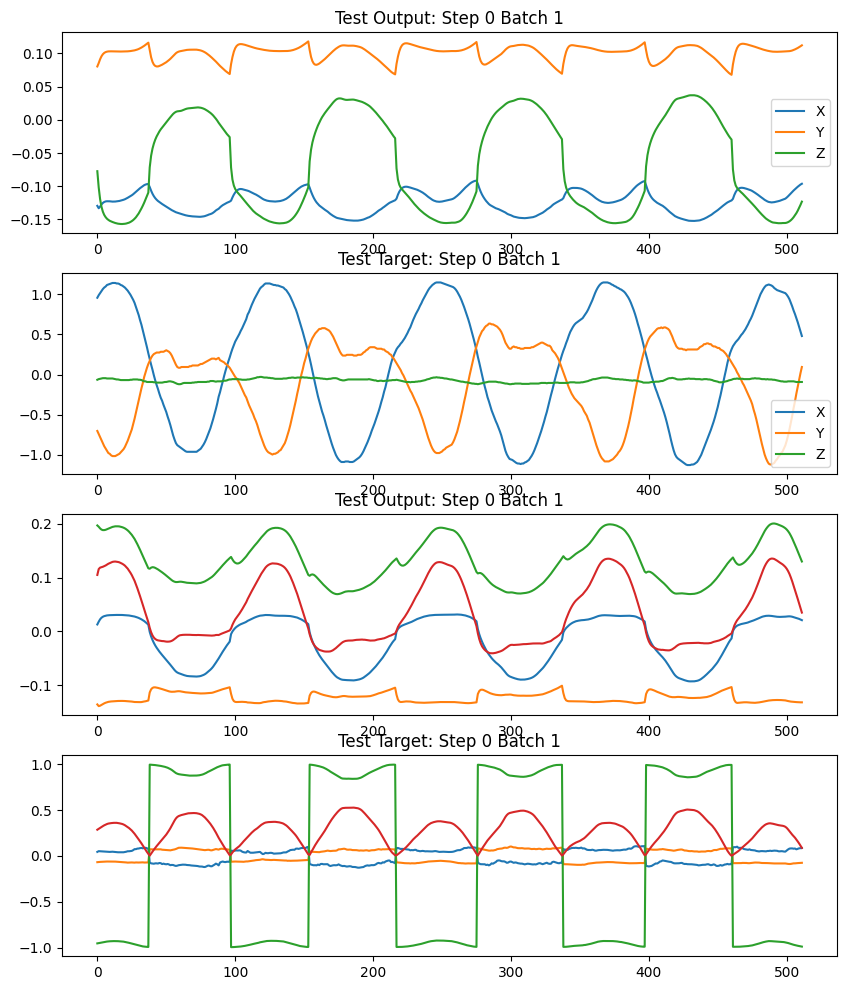

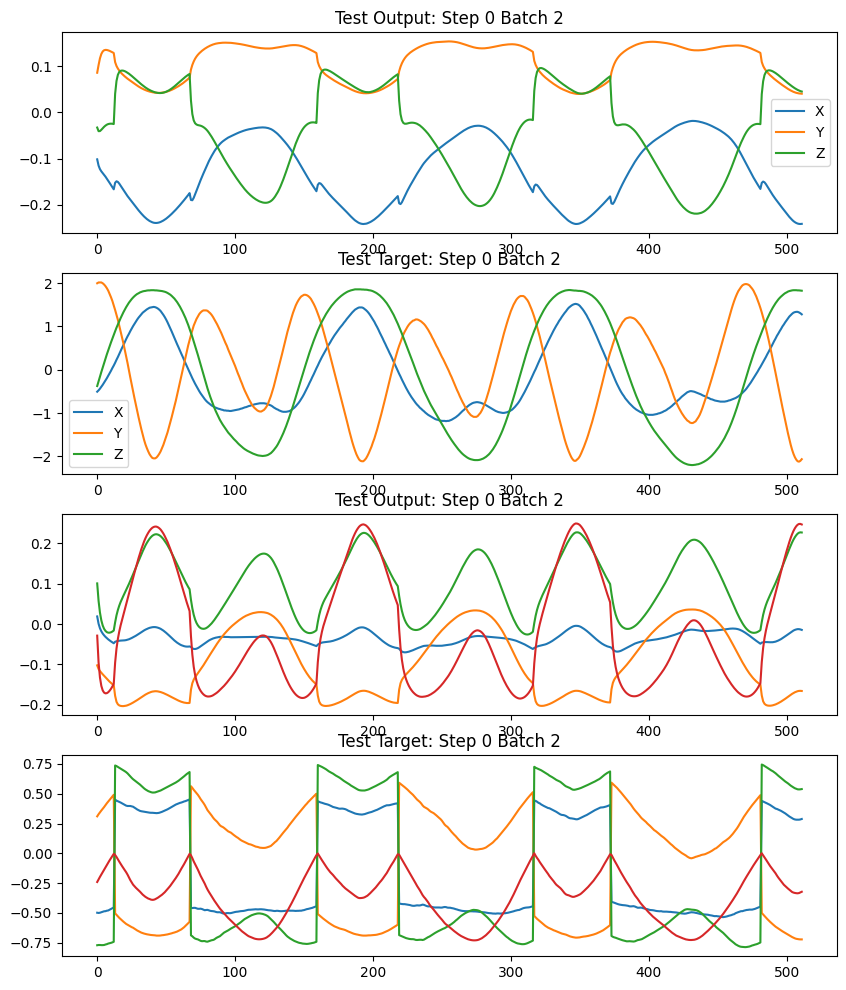

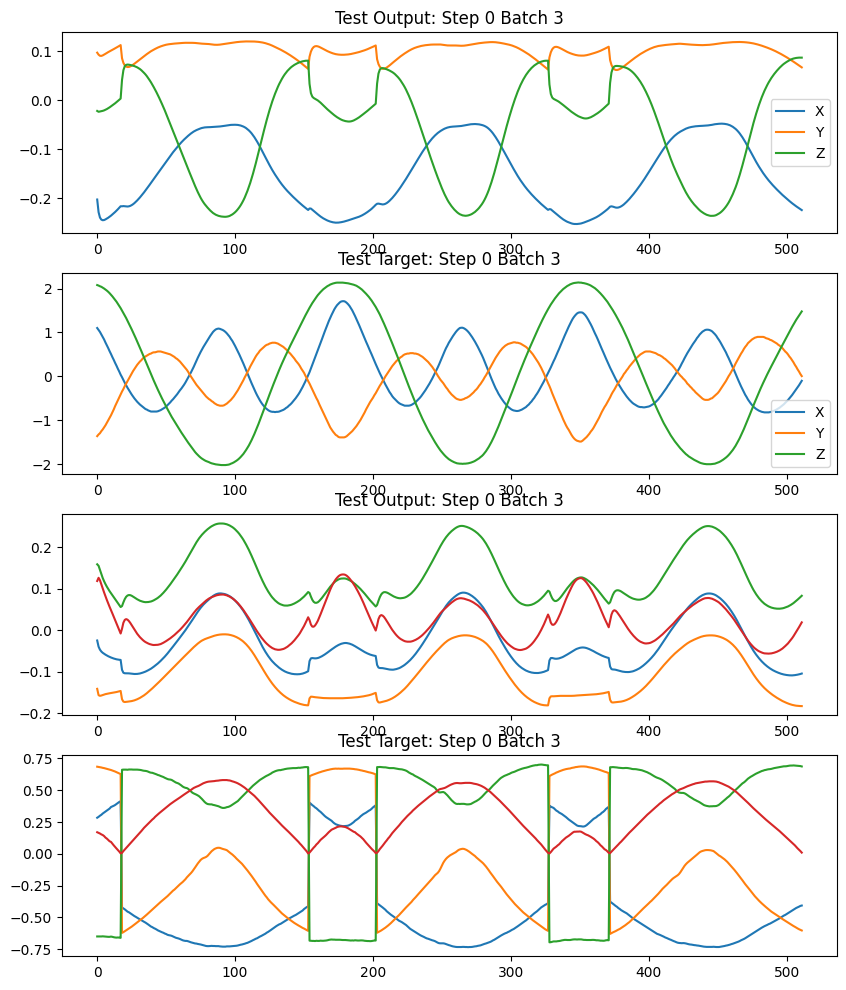

Test Loss: 0.5370544716715813
Test Metric: 0.5469053983688354


In [2]:
# Get .csv files
train_files, val_files, test_files = get_file_lists(
    val_sub_list=['05', 10, 15, 20, 25, 30],
    test_sub_list=[10], # 
)

# Get dataloaders
train_dataset = SmartwatchDataset(train_files)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=hp.BATCH_SIZE, collate_fn=SmartwatchAugmentLstm(), drop_last=True, shuffle=True)

val_dataset = SmartwatchDataset(val_files)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=hp.BATCH_SIZE, collate_fn=SmartwatchAugmentLstm(), drop_last=True, shuffle=True)

test_dataset = SmartwatchDataset(test_files)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=hp.BATCH_SIZE, collate_fn=SmartwatchAugmentLstm(), drop_last=True, shuffle=False)

# Initialize encoder and decoder
encoder_model = Encoder(
    input_size=9,
    hidden_size=32,
    num_layers=1,
    dropout_p=0.1,
).to(hp.DEVICE)
decoder_model = Decoder(
    input_size=7,
    hidden_size=32,
    output_size=7,
    num_layers=1,
    dropout_p=0.1,
).to(hp.DEVICE)

# Initialize loss functions
loss_fn = nn.MSELoss()
metric_loss_fn = nn.L1Loss()

test_LSTM(
    test_loader,
    encoder_model,
    decoder_model,
    loss_fn,
    metric_loss_fn,
    SAVE_PATH,
    hp.DEVICE,
)